In [1]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt
import tqdm
from tqdm.notebook import tqdm as tqdm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import model_opt
import algo_GD
import helper

In [2]:
w_init = np.array([3,3])
_t_max = 2
f = model_opt.RosenBrock()

In [3]:
# b <= x_1 <= a , b <= x_2 <= a において一様にランダムな点をn回とり、勾配ノルムの平均を測定
helper.grad_norm(model=f,a=3,b=-3,n=10000)

2909.138204883825

In [4]:
if __name__ == "__main__":
    
    # 自分のマシンでコアが４or6
    cpu_count = mproc.cpu_count()
    mypool = mproc.Pool(cpu_count)
    w = np.ones(cpu_count)
    first_result = mypool.map(func=helper.pareto, iterable=w)
    
    mypool.close() # important for stopping memory leaks.
    mypool.join() # wait for all workers to exit.

In [5]:
first_result

[0.17094346604106647,
 2.6457300014104437,
 0.04866653317915892,
 0.37238645221013367]

In [6]:
x = np.arange(10)
noise = helper.gauss(x)
k = helper.iqr(noise)

In [7]:
k

1.7160222556427247

In [8]:
iqr_store = []
for i in range(1000):
    x = np.arange(1000)
    noise = helper.gauss(x,mean=0,sigma=1)
    k = helper.iqr(noise)
    iqr_store.append(k)

(array([  3.,  11.,  58., 135., 206., 240., 192., 109.,  34.,  12.]),
 array([1.17928847, 1.21014892, 1.24100938, 1.27186983, 1.30273028,
        1.33359073, 1.36445118, 1.39531164, 1.42617209, 1.45703254,
        1.48789299]),
 <a list of 10 Patch objects>)

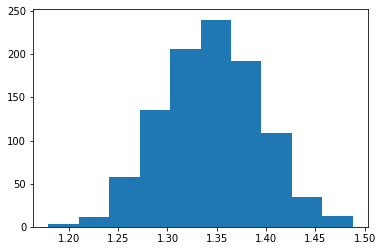

In [9]:
plt.hist(iqr_store)

In [10]:
np.mean(iqr_store) / 1.349

0.9966657322287941

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,  2.,  3.,
         2.,  5.,  2.,  6.,  8.,  7.,  6., 12.,  9., 11., 19., 13., 18.,
        16., 17., 19., 21., 15., 10., 25., 30., 16., 13., 26., 26., 28.,
        24., 30., 31., 32., 27., 28., 22., 20., 24., 24., 26., 27., 33.,
        18., 18., 10., 19., 18., 18., 10., 14., 13., 15., 14., 10.,  8.,
         7.,  8.,  8.,  9.,  8.,  4.,  6.,  2.,  4.,  3.,  1.,  3.,  1.,
         1.,  2.,  1.,  2.,  2.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.79294005, 0.80019316, 0.80744627, 0.81469938, 0.82195249,
        0.8292056 , 0.83645871, 0.84371182, 0.85096493, 0.85821804,
        0.86547115, 0.87272426, 0.87997737, 0.88723048, 0.89448359,
        0.9017367 , 0.90898981, 0.91624292, 0.92349603, 0.93074914,
        0.93800225, 0.94525536, 0.95250847, 0.95976157, 0.96701468,
        0.97426779, 0.9815209 , 0.98877401, 0.99602712, 1.00328023,
        1.01053334, 1.0177

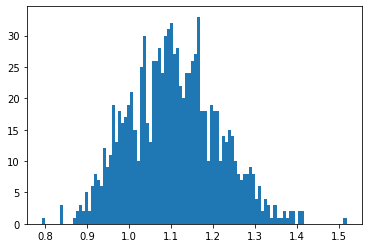

In [11]:
plt.hist(helper.lognormal(mean=0.1,sigma=0.1,w=np.arange(1000)),bins=100)

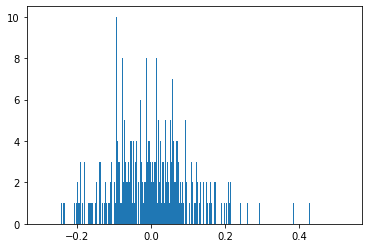

In [12]:
k = helper.lognormal(mean=0.1,sigma=0.1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

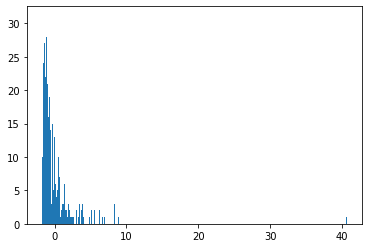

In [13]:
k = helper.lognormal(mean=0.1,sigma=1,w=np.arange(1000))
plt.hist(k - k.mean(),bins=1000)
plt.show()

In [14]:
helper.iqr(k)

1.5255495710081681

In [15]:
w_init = np.array([3,3])
_t_max = 3000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []
for i in range(10):
    var = np.random.randint(1,300,1)[0]
    noise = helper.gauss
    f = model_opt.RosenBrock(noise=noise,var=var)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        algo.update(model=f)
        
    iqr_store.append(helper.iqr(algo.noise_store))
    last_w_store.append(algo.w)
        

    

In [16]:
last_w_store

[array([ 0.04309793, -0.06107472]),
 array([-1.32926157,  1.87893815]),
 array([1.12095179, 1.10022413]),
 array([1.32508433, 2.12821853]),
 array([0.30729394, 0.2241119 ]),
 array([ 0.22370852, -0.13529255]),
 array([-1.05541499,  1.11498636]),
 array([0.59068072, 0.20539393]),
 array([-0.66240996,  0.83074539]),
 array([-0.60211499,  0.59819059])]

In [17]:
iqr_store

[63.73133723968289,
 199.02084425204947,
 175.55049871036118,
 126.80564410085867,
 200.49664306290975,
 97.04369608347484,
 48.86318929023942,
 47.92452114666775,
 354.55783578007345,
 261.5057475416035]

In [19]:
for i in tqdm(range(10)):
    pass

In [ ]:

w_init = np.array([3,3])
_t_max = 1000
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
w_star = f.w_star
f = model_opt.RosenBrock(noise=noise,var=100)
for i in tqdm(algo):
    algo.update(model=f)
    
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [ ]:
#ノイズを記録したもの。そのIQRについて調べている。
noise_norm = np.array(algo.noise_store).flatten()
helper.iqr(noise_norm)